In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,cross_val_score

from keras.models import Sequential
from keras.layers import Dense,LSTM, Masking, Dropout,Activation,Flatten
from keras.preprocessing import sequence

import tensorflow as tf
from tensorflow import keras

import time
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
tf.random.set_seed(42)

# load data

In [2]:
df1_ori=pd.read_csv('input_data_S2-WEE.csv', low_memory = False)

In [3]:
df1_ori

,T0_Act1,T0_Act2,T0_Act3,T0_Act4,T0_Act5,T0_Act6,T0_Act7,T0_Act9,T0_Act12,T0_Act13,...,T39_Act19,T39_Act2,T39_Act3,T39_Act4,T39_Act5,T39_Act6,T39_Act7,T39_Act9,id,final_result
0,12.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_23629,0
1,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_25107,1
2,0.0,1.0,3.0,5.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_29144,0
3,119.0,1.0,44.0,103.0,0.0,35.0,25.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_31663,1
4,7.0,0.0,2.0,8.0,0.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_34229,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2014J_2688945,1
5337,66.0,26.0,4.0,33.0,0.0,8.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2014J_2692969,1
5338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2014J_2694919,1
5339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2014J_2698577,0


In [6]:
df1_sorted=df1_ori.sort_values(by=['id'])
df1_sorted.head(10)

,T0_Act1,T0_Act2,T0_Act3,T0_Act4,T0_Act5,T0_Act6,T0_Act7,T0_Act9,T0_Act12,T0_Act13,...,T39_Act19,T39_Act2,T39_Act3,T39_Act4,T39_Act5,T39_Act6,T39_Act7,T39_Act9,id,final_result
1093,32.0,0.0,3.0,6.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_1008675,1
31,3.0,1.0,7.0,17.0,0.0,4.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_104054,1
32,165.0,2.0,17.0,71.0,1.0,5.0,10.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_108377,1
33,29.0,3.0,11.0,11.0,0.0,6.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_108589,1
1094,0.0,3.0,3.0,8.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_1098728,0
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_109938,1
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_110881,1
36,67.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_116603,1
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_117071,0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_120994,0


In [7]:
df1_sorted.info() # final_result  is an object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341 entries, 1093 to 3839
Columns: 482 entries, T0_Act1 to final_result
dtypes: float64(480), int64(1), object(1)
memory usage: 19.7+ MB


# prepare dataset for y

In [8]:
y = df1_sorted['final_result']

# prepare dataset for X

In [9]:
X=df1_sorted.drop(['final_result','id'], axis=1)

In [10]:
X.shape

(5341, 480)

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled.shape

(5341, 480)

In [12]:
X=X_scaled.reshape(X_scaled.shape[0],1,480)
X.shape

(5341, 1, 480)

# build LSTM model

In [13]:
X = np.array(X)
y = np.array(y)
kf = KFold(n_splits=10,shuffle=True, random_state=42)
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


KFold(n_splits=10, random_state=42, shuffle=True)
TRAIN: [   0    1    2 ... 5337 5339 5340] TEST: [   8   15   23   29   33   65   79   80   84   88  106  107  132  144
  151  157  167  168  179  199  227  228  230  239  240  245  248  251
  254  272  279  290  292  296  297  315  333  346  351  373  393  401
  410  416  418  422  426  439  443  465  468  471  472  485  486  491
  497  501  505  530  534  538  544  553  555  577  584  589  599  624
  625  626  642  653  655  683  691  696  705  721  724  734  742  746
  748  751  763  776  787  794  798  803  807  810  811  812  829  838
  848  881  898  907  911  915  926  957  964  969  977  994  996 1020
 1025 1032 1038 1044 1049 1073 1084 1086 1094 1103 1126 1128 1158 1163
 1168 1173 1188 1194 1197 1209 1215 1220 1223 1281 1292 1302 1319 1322
 1330 1344 1351 1360 1397 1406 1411 1412 1421 1438 1468 1471 1476 1477
 1480 1487 1504 1526 1533 1553 1557 1561 1580 1612 1615 1618 1620 1623
 1652 1658 1665 1666 1669 1672 1705 1743 1744 174

TRAIN: [   0    1    2 ... 5338 5339 5340] TEST: [  24   25   30   32   44   52   56   58   76   81  103  112  136  138
  156  170  174  183  194  208  217  229  256  259  263  266  276  286
  293  299  319  321  324  325  328  330  336  353  358  382  408  411
  413  430  433  436  442  449  479  498  506  507  518  540  543  557
  564  576  611  613  615  620  622  643  647  648  665  682  690  695
  725  736  744  755  761  783  785  796  801  809  817  818  835  857
  888  897  903  908  910  912  941  978  990 1003 1017 1023 1033 1046
 1051 1068 1071 1088 1097 1102 1106 1113 1119 1123 1146 1151 1157 1161
 1172 1178 1180 1186 1189 1196 1207 1211 1222 1227 1228 1237 1238 1257
 1264 1288 1303 1309 1313 1315 1350 1362 1378 1383 1393 1401 1402 1407
 1417 1426 1444 1469 1479 1482 1488 1489 1497 1507 1510 1519 1522 1551
 1552 1556 1558 1588 1589 1590 1598 1609 1610 1614 1627 1629 1654 1662
 1675 1697 1699 1700 1714 1720 1721 1730 1736 1738 1739 1746 1751 1752
 1760 1767 1769 1770 1777 17

TRAIN: [   0    1    2 ... 5338 5339 5340] TEST: [   3    5    9   54   55   66   77   94  117  125  126  133  137  164
  201  223  224  232  235  242  249  255  260  280  285  302  320  327
  341  345  357  362  364  375  384  385  388  404  419  455  467  470
  477  499  504  510  513  523  525  536  539  603  638  645  666  667
  671  673  688  713  716  722  723  760  768  770  774  793  797  814
  822  823  827  832  846  872  894  899  901  914  918  919  922  924
  928  943  946  950  951  966  984  989  992 1063 1065 1077 1118 1120
 1141 1145 1155 1160 1169 1202 1205 1214 1248 1250 1252 1254 1256 1276
 1279 1296 1308 1311 1312 1314 1318 1324 1329 1331 1332 1342 1353 1358
 1384 1387 1396 1460 1481 1493 1531 1555 1573 1574 1581 1603 1604 1605
 1619 1633 1639 1645 1646 1668 1673 1680 1719 1724 1753 1759 1761 1792
 1810 1823 1824 1827 1828 1834 1838 1848 1852 1854 1856 1857 1863 1865
 1887 1901 1906 1908 1917 1920 1944 1958 1968 1969 1970 1975 1976 1984
 1990 1994 1996 1997 2000 20

In [14]:
cvscores_accuracy = []
cvscores_fscore = []
cvscores_auc = []

for train_index, test_index in kf.split(X):
    cvscores_fscore_temp = 0
    print("\nRunning a new one...")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('\n # of train:{}; # of test:{}; total #:{}'.format(len(X_train), len(X_test), len(X_train)+len(X_test)))
    
    lr=0.0001
    epochs = 500
    model = Sequential()
    model.add(LSTM(32, dropout=0.2, input_shape=(X_train.shape[1], X_train.shape[2]),
                   return_sequences=True))
    model.add(LSTM(16, dropout=0.2, return_sequences=False))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(learning_rate=lr), 
                  metrics=['accuracy','Recall','Precision', 'AUC'])
    print(model.summary())
    history_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128, verbose=0)
    scores = model.evaluate(X_test, y_test)
    cvscores_fscore_temp = (2*scores[2]*scores[3])/(scores[2]+scores[3])
    print(scores[1])
    print(cvscores_fscore_temp)
    print(scores[4])

    cvscores_accuracy.append(scores[1] * 100)
    cvscores_fscore.append(cvscores_fscore_temp * 100)
    cvscores_auc.append(scores[4] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_accuracy), np.std(cvscores_accuracy)))
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_fscore), np.std(cvscores_fscore)))
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_auc), np.std(cvscores_auc)))


Running a new one...

 # of train:4806; # of test:535; total #:5341
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 32)             65664     
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 68,817
Trainable params: 68,817
Non-trainable params: 0
_________________________________________________________________
None
17/17 [==============================] - 0s 4ms/step - loss: 0.3365 - accuracy: 0.8766 - recall: 0.9561 - precision: 0.8831 - auc: 0.9007
0.8766354918479919
0.9181141447960816
0.9006826877593994

Running a new one...

 # of train:4807; # of t

17/17 [==============================] - 0s 4ms/step - loss: 0.3428 - accuracy: 0.8858 - recall: 0.9622 - precision: 0.8834 - auc: 0.8978
0.8857678174972534
0.921086664418916
0.8978164196014404

Running a new one...

 # of train:4807; # of test:534; total #:5341
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 1, 32)             65664     
                                                                 
 lstm_17 (LSTM)              (None, 16)                3136      
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 68,817
Trainable params: 68,817
Non-trainable params: 0
_________________________________________________________________
None
17/17 [==============================] - 0s 3m

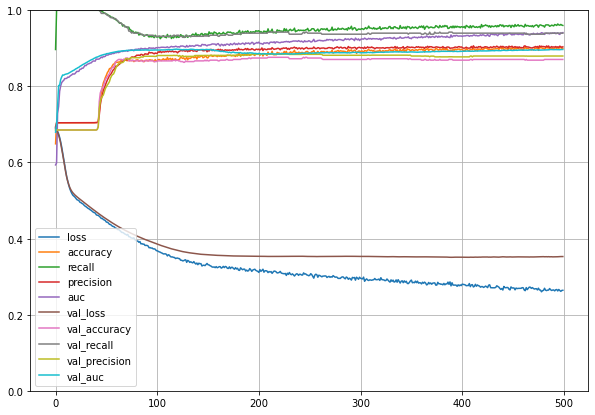

In [15]:
pd.DataFrame(history_model.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()